#Ejercicio 5

In [12]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def draw_histogram_visual(hist, block_size, num_bins=9, threshold_ratio=0.2):
    image = np.zeros((block_size, block_size), dtype=np.uint8)
    center = block_size // 2
    max_val = hist.max() if hist.max() != 0 else 1
    threshold = max_val * threshold_ratio

    for i in range(num_bins):
        if hist[i] < threshold:
            continue  # Ignorar líneas con magnitud baja

        angle = np.deg2rad(i * 180 / num_bins + 90 / num_bins)
        magnitude = hist[i] / max_val * (block_size // 2)
        dx = int(magnitude * np.cos(angle))
        dy = int(magnitude * np.sin(angle))

        pt1 = (center - dx, center - dy)
        pt2 = (center + dx, center + dy)

        # Línea suave
        cv2.line(image, pt1, pt2, 255, 1, lineType=cv2.LINE_AA)

    return image

def compute_orientation_visual(image, block_size=8, num_bins=9):
    """Procesa la imagen y genera la visualización de orientación por bloques."""
    gx = cv2.Sobel(image, cv2.CV_32F, 1, 0, ksize=3)
    gy = cv2.Sobel(image, cv2.CV_32F, 0, 1, ksize=3)

    magnitude, angle = cv2.cartToPolar(gx, gy, angleInDegrees=True)
    angle = angle % 180  # Limitar a 0-180 grados

    h, w = image.shape
    out_image = np.zeros((h, w), dtype=np.uint8)

    for y in range(0, h - block_size + 1, block_size):
        for x in range(0, w - block_size + 1, block_size):
            block_mag = magnitude[y:y+block_size, x:x+block_size]
            block_ang = angle[y:y+block_size, x:x+block_size]

            hist = np.zeros(num_bins, dtype=np.float32)
            bin_width = 180 / num_bins

            for i in range(block_size):
                for j in range(block_size):
                    bin_idx = int(block_ang[i, j] // bin_width) % num_bins
                    hist[bin_idx] += block_mag[i, j]

            vis_block = draw_histogram_visual(hist, block_size, num_bins)
            out_image[y:y+block_size, x:x+block_size] = vis_block

    return out_image

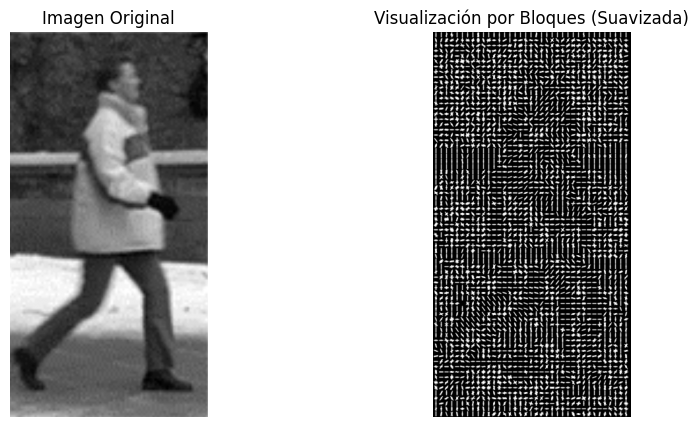

In [13]:
# Mostrar resultado
image = cv2.imread('person.png', cv2.IMREAD_GRAYSCALE)
vis_orient = compute_orientation_visual(image, block_size=8, num_bins=9)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Imagen Original")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(vis_orient, cmap='gray')
plt.title("Visualización por Bloques (Suavizada)")
plt.axis('off')
plt.show()

# Ejercicio 6

In [8]:
from skimage.feature import hog
from skimage import color

from skimage.io import imread
from skimage import img_as_float

image = cv2.imread('person.png', cv2.IMREAD_GRAYSCALE)
image_float = img_as_float(image)

fd, hog_image = hog(image_float,
                    orientations=9,
                    pixels_per_cell=(8, 8),
                    cells_per_block=(2, 2),
                    visualize=True,
                    block_norm='L2-Hys')

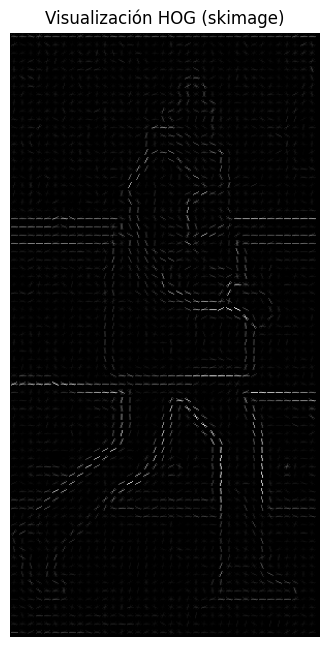

In [9]:
plt.figure(figsize=(4, 8))
plt.imshow(hog_image, cmap='gray')
plt.title("Visualización HOG (skimage)")
plt.axis('off')
plt.show()